# Read Low Frequency Hydrophone Data from IRIS

This example code will download a 10 minute OOI low frequency hydrophone clip in mseed file format from the IRIS repository or load a previously downloaded clip and then use obsspy to plot it and save it as a wave file 

To run this in Anaconda you may need to load an extra library if not already loaded. The first is obspy (obs for ocean bottom seismometers) as this knows how to load mseed files - a standard in seismic community - and how the high frequency hydrophone data is stored in on the raw data repository. See the note here on how to install the binaries here: https://github.com/obspy/obspy/wiki/Installation-via-Anaconda

This notebook is based on the workbook from Pete Cable - https://github.com/petercable/shared_notebooks/blob/master/antelope/Antelope_to_WAV.ipynb

IRIS has a handy URL builder tool here:

http://service.iris.edu/irisws/timeseries/docs/1/builder/

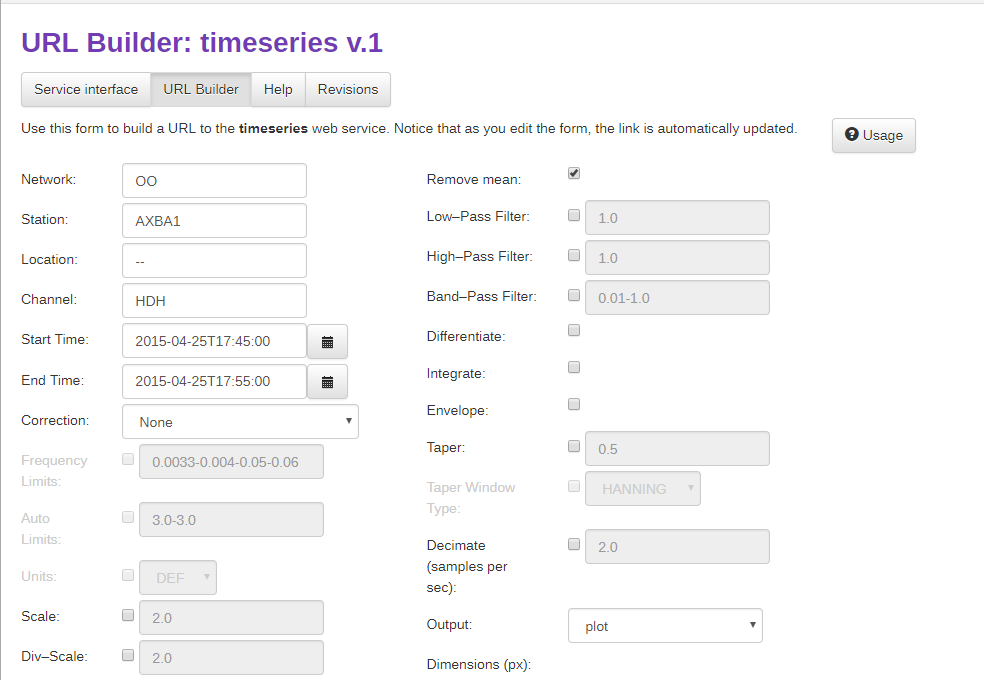

OO (letter O)is the OOI Network
Station Code AXBA1 is for a Broadband Seismometer and Low Frequency Hydrophone on the Axial Calerda
!!!Make sure to put in the "--" fo Location or it wont work
Channel HDH is the Low Frequency Hydrophone Channel at Sample at 200Hz

For this I have output type set to Plot and get the image below but for the sample code I will change it to mseed. You could also as for audio files directly.

I picked a time during the lava flow in after the last eruption in 2015 - These sounds are not seismic events but noises from the lava cooling in the cold seawater. 

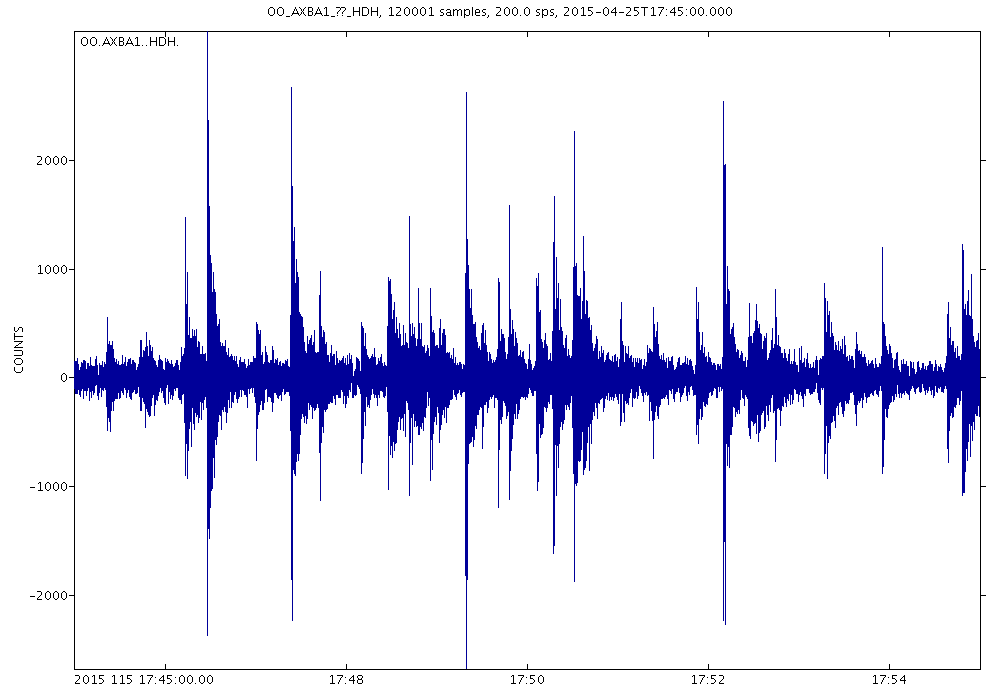


Here are the other brodadband seismometer station_codes
obs_stations = [{"station_code":"AXBA1","refdes":'OBSBKA301'},
                {"station_code":"AXCC1","refdes":'OBSBBA301'},
                {"station_code":"AXEC2","refdes":'OBSBBA302'},
                {"station_code":"HYS14","refdes":'OBSBBA101'},
                {"station_code":"HYSB1","refdes":'OBSBKA101'}]

And different sample rates channels
obs_channels = 'BHE','BHN','BHZ','HHE','HHN','HHZ','LHE','LHN','LHZ','MHE','MHN','MHZ'

There are also short period siesmometers 

sps_stations = [{"station_code":"AXAS1","refdes":'OBSSPA301'},
                {"station_code":"AXAS2","refdes":'OBSSPA302'},
                {"station_code":"AXEC1","refdes":'OBSSPA303'},
                {"station_code":"AXEC3","refdes":'OBSSPA304'},
                {"station_code":"AXID1","refdes":'OBSSPA305'},
                {"station_code":"HYS11","refdes":'OBSSPA101'},
                {"station_code":"HYS12","refdes":'OBSSPA102'},
                {"station_code":"HYS13","refdes":'OBSSPA103'}]

sps_channels = 'EHE','EHN','EHZ','MHE','MHN','MHZ'



Ok now we will download the file from IRIS - plot it and then save to a wave file that we can listen to

In [1]:
from obspy import read
from obspy.core import UTCDateTime
import wave

%matplotlib inline
data_url = 'http://service.iris.edu/irisws/timeseries/1/query?net=OO&sta=AXBA1&cha=HDH&start=2015-04-25T17:45:00&end=2015-04-25T17:55:00&demean=true&output=miniseed&loc=--'
localFileName = 'AXBA1.OO..HDH.2015.115.17.45.00.000-2015.115.17.55.00.000.rm.miniseed'

You can download directly from OOI in the program via the url or to speed up development download the file and place it in the same directory as this notebook and then read the local file.

In [2]:
loadFromOOI=True

if loadFromOOI==True :
    stream = read(data_url)
else:
    stream = read(localFileName)  # Read Previoulsy Download local file for speed

# print some stats about this signal
stream

1 Trace(s) in Stream:
OO.AXBA1..HDH | 2015-04-25T17:45:00.000000Z - 2015-04-25T17:55:00.000000Z | 200.0 Hz, 120001 samples

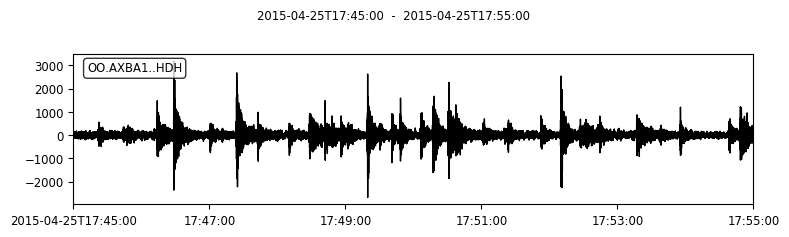

In [3]:
#Documentation about the obspy library is here https://docs.obspy.org/contents.html
# and list of things you can do with a stream now that its loaded is here
#https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html

#plot the entire 5 minute clip
stream.plot()

1 Trace(s) in Stream:
OO.AXBA1..HDH | 2015-04-25T17:46:28.000000Z - 2015-04-25T17:46:33.000000Z | 200.0 Hz, 1001 samples


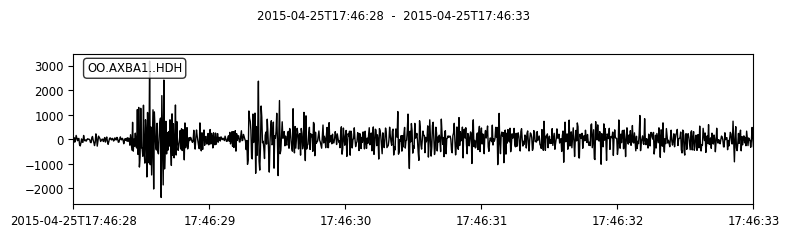

In [4]:
#zoom in and look at just 5 seconds - The spikes every 1/sec are from a co-located ADCP

dt = UTCDateTime("2015-04-25T17:46:28")
st = stream.slice(dt, dt + 5)
print(st)  
st.plot()

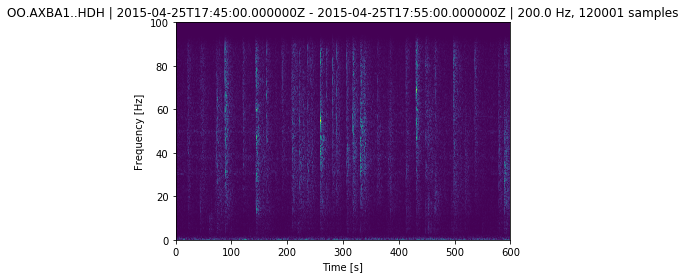

[None]

In [5]:
stream.spectrogram()  

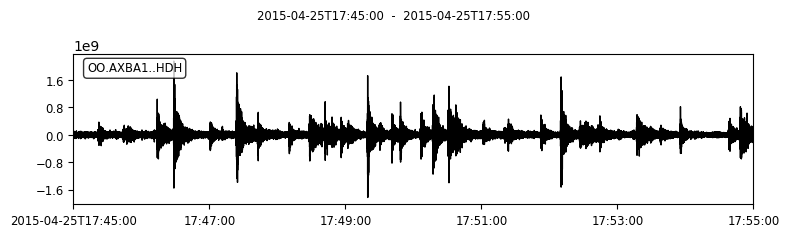

In [6]:
#lets convert it to something easy to play on a PC

trace = stream[0].copy()
trace.filter('highpass', freq=2.0)

#convert to full scale and then make 32 bit

trace.normalize()
trace.data = (trace.data * (2**31-1)).astype('int32')
trace.plot()



In [7]:
#write it to an audio file that can it can be played in like Audacity
#speed it up by 4X to "enhance" the audio effect

trace.write('iris-test.wav', format='WAV', framerate=800)